# Heart Disease Classification with DecisionTree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Loading the Data

[UCI Heart-Disease Data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Targets:
- 0: Has Disease
- 1: No Disease

In [8]:
df=pd.read_csv('heart.csv')
train_df = pd.read_csv('Heart_train.csv')
test_df = pd.read_csv('Heart_test.csv')

train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
1,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
2,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
3,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
4,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


## Train-test Split

Before we proceed further, we split the data.

Split into `X_train`, `X_test`, `y_train`, `y_test`.

Use: `test_size=0.2`, `random_state=1`

In [9]:
X_train = train_df.drop(columns='target')
X_test = test_df.drop(columns='target')
y_train = train_df['target']
y_test = test_df['target']

In [10]:
# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
# xdf =pd.DataFrame({'Country':['Nepal','India','China']})
# pd.get_dummies(xdf)

In [13]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

train_profile = ProfileReport(train_df, title='Pandas Profiling Train Dataset Report', html={'style':{'full_width':True}})
test_profile = ProfileReport(test_df, title='Pandas Profiling Test Dataset Report', html={'style':{'full_width':True}})

profile


## One-Hot Encoding

We need to One-Hot-Encoded the Categorical Columns. **Q. Why?**

Use `OneHotEncoder` to encode the categorical columns then concat (horizontally; `axis=1`) to get final DataFrame.

Repeat for Test set.

At the end we should have `X_train_encoded` and `X_test_encoded`.

In [14]:
cat_columns = ['cp', 'exang', 'slope', 'thal']
num_columns = [c for c in X_train.columns if c not in cat_columns]

In [15]:
print(num_columns)
cat_columns

['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'ca']


['cp', 'exang', 'slope', 'thal']

In [16]:
from sklearn.preprocessing import OneHotEncoder

## On Training Data

In [17]:
encoder=OneHotEncoder(handle_unknown='ignore')

# Fit on categorical columns
# cp -> {1,0,2,3}
# cp_0
# cp_1
# cp_2
# cp_3
encoder.fit(X_train[cat_columns])

#Column Names
column_names=encoder.get_feature_names(input_features = cat_columns)

num_columns + list(column_names)

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'oldpeak',
 'ca',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'exang_0',
 'exang_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3']

In [18]:
def dataset_to_encode(X,y):
    X_cat_encoded=encoder.transform(X[cat_columns])
    
    X_cat_encoded_df=pd.DataFrame(X_cat_encoded.todense(),columns=column_names,index=X.index)
    
    X_encoded = pd.concat([X[num_columns], X_cat_encoded_df],axis=1)
    return X_encoded

X_train_encoded=dataset_to_encode(X_train,y_train)

X_test_encoded=dataset_to_encode(X_test,y_test)

## Train Data

In [19]:
print(X_train_encoded.shape)
X_train_encoded.head()

(242, 22)


,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,cp_0,...,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,67,1,152,212,0,0,150,0.8,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,53,1,130,246,1,0,173,0.0,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,61,1,134,234,0,1,145,2.6,2,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,45,1,128,308,0,0,170,0.0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,50,1,144,200,0,0,126,0.9,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Test Data

In [20]:
print(X_test_encoded.shape)
X_test_encoded.head()

(61, 22)


,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,cp_0,...,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,58,1,120,284,0,0,160,1.8,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,52,1,112,230,0,1,160,0.0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42,0,120,209,0,1,173,0.0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,55,1,130,262,0,1,155,0.0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,53,0,130,264,0,0,143,0.4,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Bagging Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score 

In [25]:
from sklearn.model_selection import GridSearchCV

grid_params={
    'n_estimators' : (10,50,100),
    'max_features': (.6,.7,.8,.9,1.0),
    'max_samples' : (.6,.7,.8,.9,1.0)
            }

In particular, max_samples and max_features control the size of the subsets (in terms of samples and features), while bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement.

In [26]:
clf=GridSearchCV(BaggingClassifier(random_state=1),
                     grid_params,scoring='accuracy')
clf.fit(X_train_encoded,y_train)
print('Best score: ', clf.best_score_,'\n',clf.best_params_)

y_preds_final =clf.predict(X_test_encoded)
accuracy=accuracy_score(y_test,y_preds_final)
print('Accuracy:{0:.3f}'.format(accuracy))

Best score:  0.810204081632653 
 {'max_features': 0.6, 'max_samples': 0.7, 'n_estimators': 100}
Accuracy:0.803


## Gradient  Tree Boosting

The number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators; 

The size of each tree can be controlled either by setting the tree depth via max_depth or by setting the number of leaf nodes via max_leaf_nodes. 

The learning_rate is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage .

Note: For SVM:

Classification with more than 2 classes requires the induction of n_classes regression trees at each iteration, thus, the total number of induced trees equals n_classes * n_estimators. For datasets with a large number of classes we strongly recommend to use HistGradientBoostingClassifier as an alternative to GradientBoostingClassifier.

## AdaBoostClassifier

The number of weak learners is controlled by the parameter n_estimators. 
The learning_rate parameter controls the contribution of the weak learners in the final combination. 
By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. 

The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split).

## Automation

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

i=0

In [30]:
def grid_search_classifier(classifier, train_x, train_y, test_x, test_y, grid_params, scoring='accuracy'):
    clf=GridSearchCV(classifier(random_state=1),
                     grid_params,scoring='accuracy')
    
    clf.fit(train_x,train_y)
    print('Best score: ', clf.best_score_,clf.best_params_)
    

    best_model=clf.best_estimator_
    best_model.fit(train_x,train_y)

    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]   #gives the index of highest importances in descending order
    columns=num_columns + list(column_names)
    names=[columns[i] for i in indices]
    
    global i
    name_classifier=['Decision Tree Classifier','Gradient Boosting Classifier', 'Ada Boost Classifier', 'Random Forest Classifier','Extra Trees Classifier']
    plt.title('Feature Importances of {}'.format(name_classifier[i]))
    plt.bar(range(X_train_encoded.shape[1]),importances[indices])
    plt.xticks(range(X_train_encoded.shape[1]),names,rotation=90)
    plt.xlabel('Important Features (From left to right)')
    plt.ylabel('Feature Values')
    plt.show()
    i=i+1
    
    df=pd.DataFrame({'Feature': names,'Importance': importances[indices]})
    print('The top five features and its importance:\n ',df.head())
    

    y_preds_final =best_model.predict(test_x)
    accuracy=accuracy_score(test_y,y_preds_final)

    return accuracy

## Hyperparameter Tuning with many features

In [31]:
list_classifier=[(DecisionTreeClassifier,{'max_depth': [3, 5, 7, 9, 11],'min_samples_split': [2, 4, 6, 8, 10],'min_samples_leaf' : [1, 2, 3, 4]}),
                (GradientBoostingClassifier,{'n_estimators':[5,10,20,50],'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],'max_depth' : [3, 5, 7, 9],'min_samples_split': [2,4,6,8,10]}),
                (AdaBoostClassifier,{'n_estimators':[5,10,20],'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]}),
                (RandomForestClassifier,{'n_estimators':[5,10,20,50],'max_depth': [3, 5, 7, 9, 11],'min_samples_split': [2, 4, 6, 8, 10],'max_features':[0.4,0.5,0.6,0.7],'min_sampl,es_leaf' : [1, 2, 3, 4]}),
                (ExtraTreesClassifier,  {'n_estimators':[5,10,20,50],'max_depth': [3, 5, 7, 9, 11],'min_samples_split': [2, 4, 6, 8, 10],'min_samples_leaf' : [1, 2, 3, 4]})
]

Best score:  0.7812925170068027 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


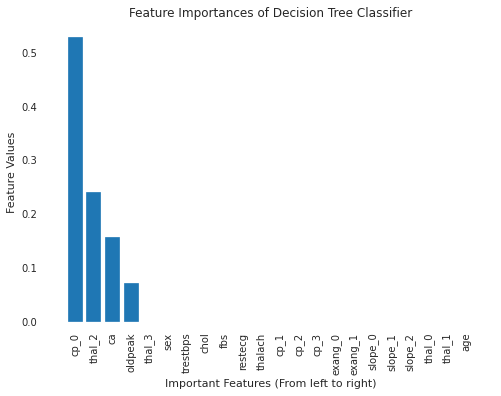

The top five features and its importance:
     Feature  Importance
0     cp_0    0.528091
1   thal_2    0.241764
2       ca    0.158342
3  oldpeak    0.071803
4   thal_3    0.000000


Best score:  0.8058673469387756 {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}


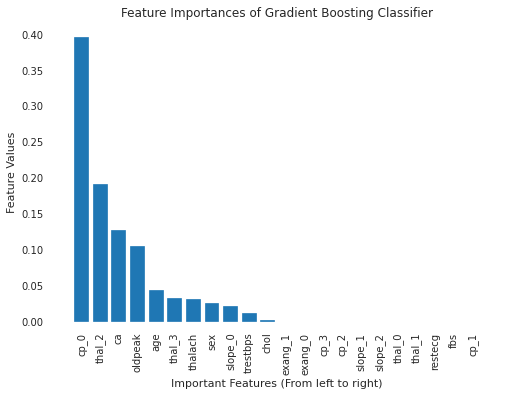

The top five features and its importance:
     Feature  Importance
0     cp_0    0.395993
1   thal_2    0.192821
2       ca    0.127874
3  oldpeak    0.106292
4      age    0.044697


Best score:  0.8471088435374149 {'learning_rate': 0.25, 'n_estimators': 20}


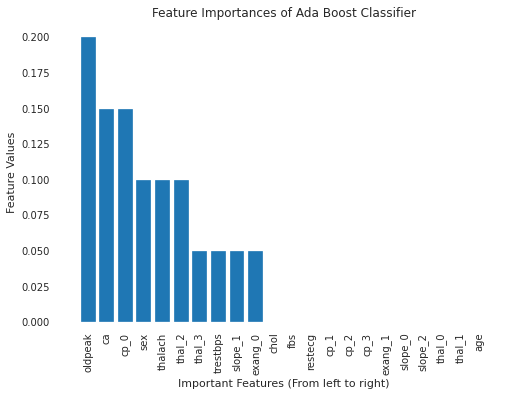

The top five features and its importance:
     Feature  Importance
0  oldpeak        0.20
1       ca        0.15
2     cp_0        0.15
3      sex        0.10
4  thalach        0.10


Best score:  0.8306972789115645 {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


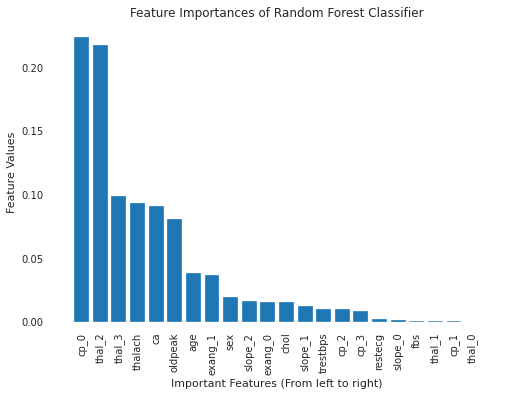

The top five features and its importance:
     Feature  Importance
0     cp_0    0.223650
1   thal_2    0.217832
2   thal_3    0.099122
3  thalach    0.093811
4       ca    0.091603


Best score:  0.8513605442176871 {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 5}


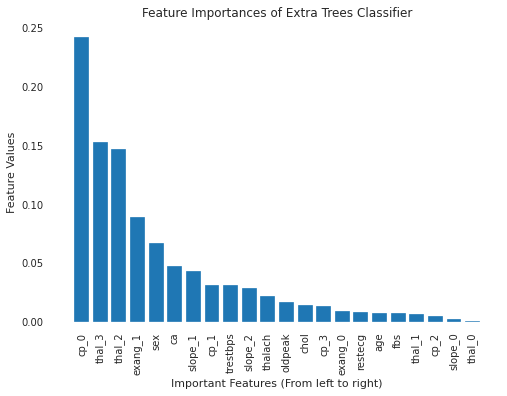

The top five features and its importance:
     Feature  Importance
0     cp_0    0.242013
1   thal_3    0.153368
2   thal_2    0.147226
3  exang_1    0.089579
4      sex    0.066972


[{'Classifier: ': "<class 'sklearn.tree._classes.DecisionTreeClassifier'>", 'Accuracy': 0.819672131147541}, {'Classifier: ': "<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>", 'Accuracy': 0.8524590163934426}, {'Classifier: ': "<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>", 'Accuracy': 0.8360655737704918}, {'Classifier: ': "<class 'sklearn.ensemble._forest.RandomForestClassifier'>", 'Accuracy': 0.8032786885245902}, {'Classifier: ': "<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>", 'Accuracy': 0.7868852459016393}] 



In [32]:
accuracies=[]
for classifier, grid in list_classifier:
    accuracy=grid_search_classifier(classifier, X_train_encoded, y_train, X_test_encoded, y_test, grid)
    accuracies.append({'Classifier: ': str(classifier),'Accuracy':accuracy})
    print('\n')
print(accuracies,'\n')